## Feature engineering Data

In [3]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("GermanCredit.csv")

In [5]:
df.head()

,Unnamed: 0,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,1,6,1169,4,4,67,2,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1,2,48,5951,2,2,22,1,1,1,1,...,0,0,1,0,1,0,0,0,1,0
2,3,12,2096,2,3,49,1,2,1,1,...,0,0,1,0,1,0,0,1,0,0
3,4,42,7882,2,4,45,1,2,1,1,...,0,0,1,0,0,1,0,0,1,0
4,5,24,4870,3,4,53,2,2,1,1,...,0,0,1,0,0,1,0,0,1,0


In [6]:
df = df.drop(columns = ["Unnamed: 0", "Class"])

In [7]:
df.columns

Index(['Duration', 'Amount', 'InstallmentRatePercentage', 'ResidenceDuration',
       'Age', 'NumberExistingCredits', 'NumberPeopleMaintenance', 'Telephone',
       'ForeignWorker', 'CheckingAccountStatus.lt.0',
       'CheckingAccountStatus.0.to.200', 'CheckingAccountStatus.gt.200',
       'CheckingAccountStatus.none', 'CreditHistory.NoCredit.AllPaid',
       'CreditHistory.ThisBank.AllPaid', 'CreditHistory.PaidDuly',
       'CreditHistory.Delay', 'CreditHistory.Critical', 'Purpose.NewCar',
       'Purpose.UsedCar', 'Purpose.Furniture.Equipment',
       'Purpose.Radio.Television', 'Purpose.DomesticAppliance',
       'Purpose.Repairs', 'Purpose.Education', 'Purpose.Vacation',
       'Purpose.Retraining', 'Purpose.Business', 'Purpose.Other',
       'SavingsAccountBonds.lt.100', 'SavingsAccountBonds.100.to.500',
       'SavingsAccountBonds.500.to.1000', 'SavingsAccountBonds.gt.1000',
       'SavingsAccountBonds.Unknown', 'EmploymentDuration.lt.1',
       'EmploymentDuration.1.to.4', 'Emp

In [8]:
print(df.dtypes)

Duration                                  int64
Amount                                    int64
InstallmentRatePercentage                 int64
ResidenceDuration                         int64
Age                                       int64
                                          ...  
Housing.ForFree                           int64
Job.UnemployedUnskilled                   int64
Job.UnskilledResident                     int64
Job.SkilledEmployee                       int64
Job.Management.SelfEmp.HighlyQualified    int64
Length: 61, dtype: object


The data has multiple boolean columns related to one variable for several variables, essentially using one hot-encoding. We want to turn these columns into categorical variables by creating levels for each variable and merging related columns into one.

In [9]:
# Merge checking account status columns 
def assign_account_status(row):
    if row['CheckingAccountStatus.none'] == 1:
        return 0
    elif row['CheckingAccountStatus.lt.0'] == 1:
        return 1
    elif row['CheckingAccountStatus.0.to.200'] == 1:
        return 2
    elif row['CheckingAccountStatus.gt.200'] == 1:
        return 3
    else:
        return np.nan  # In case no condition is met (optional)

# Apply the function row-wise
df['CheckingAccountStatus'] = df.apply(assign_account_status, axis=1)

# Drop the old columns
df.drop(columns=['CheckingAccountStatus.lt.0', 'CheckingAccountStatus.0.to.200', 
                 'CheckingAccountStatus.gt.200', 'CheckingAccountStatus.none'], inplace=True)


In [10]:
# Merge credit history columns 
def assign_credit_status(row):
    if row['CreditHistory.PaidDuly'] == 1:
        return 0
    elif row['CreditHistory.Delay'] == 1:
        return 1
    elif row['CreditHistory.Critical'] == 1:
        return 2
    elif row['CreditHistory.NoCredit.AllPaid']==1:
        return 3
    elif row['CreditHistory.ThisBank.AllPaid']==1:
        return 3
    else:
        return np.nan  # In case no condition is met (optional)

# Apply the function row-wise
df['CreditHistory'] = df.apply(assign_credit_status, axis=1)

# Drop the old columns
df.drop(columns=['CreditHistory.PaidDuly', 'CreditHistory.Delay', 
                 'CreditHistory.Critical', 'CreditHistory.NoCredit.AllPaid',
                 'CreditHistory.ThisBank.AllPaid'], inplace=True)


In [11]:
# Merge purpose columns 
def assign_purpose(row):
    if row['Purpose.NewCar'] == 1:
        return 0
    elif row['Purpose.UsedCar'] == 1:
        return 1
    elif row['Purpose.Furniture.Equipment'] == 1:
        return 2
    elif row['Purpose.Radio.Television'] == 1:
        return 3
    elif row['Purpose.DomesticAppliance'] == 1:
        return 4
    elif row['Purpose.Repairs'] == 1:
        return 5
    elif row['Purpose.Education'] == 1:
        return 6
    elif row['Purpose.Vacation'] == 1:
        return 7
    elif row['Purpose.Retraining'] == 1:
        return 8
    elif row['Purpose.Business'] == 1:
        return 9
    elif row['Purpose.Other'] == 1:
        return 10
    else:
        return np.nan  # In case no condition is met (optional)

# Apply the function row-wise
df['Purpose'] = df.apply(assign_purpose, axis=1)

In [12]:
# Drop the old columns
df.drop(columns=[col for col in df.columns if col.startswith('Purpose.')], inplace=True)

In [13]:
# Merge savings account status columns 
def assign_savings_status(row):
    if row['SavingsAccountBonds.lt.100'] == 1:
        return 0
    elif row['SavingsAccountBonds.100.to.500'] == 1:
        return 1
    elif row['SavingsAccountBonds.500.to.1000'] == 1:
        return 2
    elif row['SavingsAccountBonds.gt.1000'] == 1:
        return 3
    elif row['SavingsAccountBonds.Unknown'] == 1:
        return 4
    else:
        return np.nan  # In case no condition is met (optional)
    
df['Savings'] = df.apply(assign_savings_status, axis=1)

In [14]:
# Drop the old columns
df.drop(columns=[col for col in df.columns if col.startswith('SavingsAccountBonds.')], inplace=True)

In [15]:
# Merge employment status columns 
def assign_employment_status(row):
    if row['EmploymentDuration.lt.1'] == 1:
        return 0
    elif row['EmploymentDuration.1.to.4'] == 1:
        return 1
    elif row['EmploymentDuration.4.to.7'] == 1:
        return 2
    elif row['EmploymentDuration.gt.7'] == 1:
        return 3
    elif row['EmploymentDuration.Unemployed'] == 1:
        return 4
    else:
        return np.nan  # In case no condition is met (optional)

# Apply the function row-wise
df['EmploymentStatus'] = df.apply(assign_employment_status, axis=1)

# Drop the old columns
df.drop(columns=[col for col in df.columns if col.startswith('EmploymentDuration.')], inplace=True)


In [16]:
# Merge personal status columns 
def assign_personal_status(row):
    if row['Personal.Male.Divorced.Seperated'] == 1:
        return 0
    elif row['Personal.Female.NotSingle'] == 1:
        return 1
    elif row['Personal.Male.Single'] == 1:
        return 2
    elif row['Personal.Male.Married.Widowed'] == 1:
        return 3
    elif row['Personal.Female.Single'] == 1:
        return 4
    else:
        return np.nan  # In case no condition is met (optional)

# Apply the function row-wise
df['PersonalStatus'] = df.apply(assign_personal_status, axis=1)

# Drop the old columns
df.drop(columns=[col for col in df.columns if col.startswith('Personal.')], inplace=True)


In [17]:
# Merge other debtors columns 
def assign_debtors_guarantors_status(row):
    if row['OtherDebtorsGuarantors.None'] == 1:
        return 0
    elif row['OtherDebtorsGuarantors.CoApplicant'] == 1:
        return 1
    elif row['OtherDebtorsGuarantors.Guarantor'] == 1:
        return 2
    else:
        return np.nan

# Apply the function row-wise
df['OtherDebtors'] = df.apply(assign_debtors_guarantors_status, axis=1)

# Drop the old columns
df.drop(columns=[col for col in df.columns if col.startswith('OtherDebtorsGuarantors.')], inplace=True)


In [18]:
# Merge property status columns 
def assign_property_status(row):
    if row['Property.RealEstate'] == 1:
        return 0
    elif row['Property.Insurance'] == 1:
        return 1
    elif row['Property.CarOther'] == 1:
        return 2
    elif row['Property.Unknown'] == 1:
        return 3
    else:
        return np.nan

# Apply the function row-wise
df['PropertyStatus'] = df.apply(assign_property_status, axis=1)

# Drop the old columns
df.drop(columns=[col for col in df.columns if col.startswith('Property.')], inplace=True)

In [19]:
# Merge installment plan columns 
def assign_installment_plans_status(row):
    if row['OtherInstallmentPlans.Bank'] == 1:
        return 0
    elif row['OtherInstallmentPlans.Stores'] == 1:
        return 1
    elif row['OtherInstallmentPlans.None'] == 1:
        return 2
    else:
        return np.nan

# Apply the function row-wise
df['InstallmentPlansStatus'] = df.apply(assign_installment_plans_status, axis=1)

# Drop the old columns
df.drop(columns=[col for col in df.columns if col.startswith('OtherInstallmentPlans.')], inplace=True)


In [20]:
# Merge housing status columns 
def assign_housing_status(row):
    if row['Housing.Rent'] == 1:
        return 0
    elif row['Housing.Own'] == 1:
        return 1
    elif row['Housing.ForFree'] == 1:
        return 2
    else:
        return np.nan

# Apply the function row-wise
df['HousingStatus'] = df.apply(assign_housing_status, axis=1)

# Drop the old columns
df.drop(columns=[col for col in df.columns if col.startswith('Housing.')], inplace=True)

In [21]:
# Merge job status columns 
def assign_job_status(row):
    if row['Job.UnemployedUnskilled'] == 1:
        return 0
    elif row['Job.UnskilledResident'] == 1:
        return 1
    elif row['Job.SkilledEmployee'] == 1:
        return 2
    elif row['Job.Management.SelfEmp.HighlyQualified'] == 1:
        return 3
    else:
        return np.nan

# Apply the function row-wise
df['JobStatus'] = df.apply(assign_job_status, axis=1)

# Drop the old columns
df.drop(columns=[col for col in df.columns if col.startswith('Job.')], inplace=True)



In [22]:
# check final columns are correct
df.columns

Index(['Duration', 'Amount', 'InstallmentRatePercentage', 'ResidenceDuration',
       'Age', 'NumberExistingCredits', 'NumberPeopleMaintenance', 'Telephone',
       'ForeignWorker', 'CheckingAccountStatus', 'CreditHistory', 'Purpose',
       'Savings', 'EmploymentStatus', 'PersonalStatus', 'OtherDebtors',
       'PropertyStatus', 'InstallmentPlansStatus', 'HousingStatus',
       'JobStatus'],
      dtype='object')

In [23]:
df.columns[df.isna().any()] # no na's

Index([], dtype='object')

In [24]:
# plotting correlation matrix to see if further cleaning is necessary
correlation_matrix = df.corr()

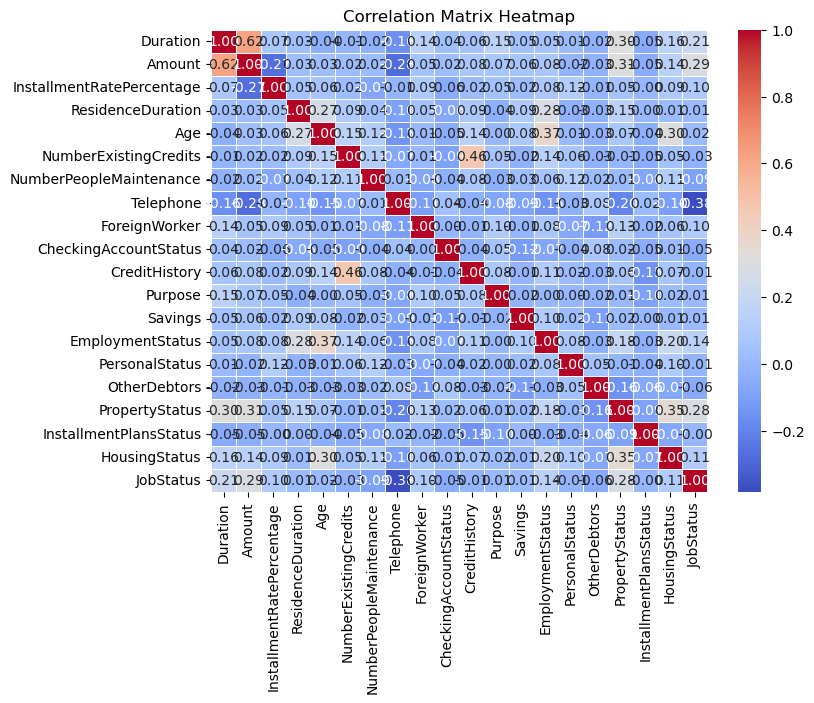

In [25]:
plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title("Correlation Matrix Heatmap")

plt.show()

The final variables do not have high correlation with one another so we are done with the feature engineering and can save the csv to run the rest of the assignment in R.

In [26]:
df.to_csv("german_credit_hw1.csv")